Check the result

In [2]:
import numpy as np
import pandas as pd
question_df = pd.read_json("eval_result_11_29.json", lines=True)

columns = ['long_score', 'long_recall_score', 'short_score', 'base_dialog_score', 'base_paragraph_score']
observe_df = question_df.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)

for col in columns:
    data = observe_df[col].astype(int)
    print(f"{col} 平均數: {np.mean(data)}")
    print(f"{col} 中位數: {np.median(data)}")
    print(f"{col} 標準差: {np.std(data)}")
    print(f"{col} 變異數: {np.var(data)}")
    print("------------")

long_score 平均數: 9.03
long_score 中位數: 9.0
long_score 標準差: 0.8746999485537884
long_score 變異數: 0.7651000000000001
------------
long_recall_score 平均數: 9.254
long_recall_score 中位數: 10.0
long_recall_score 標準差: 1.0627718475759507
long_recall_score 變異數: 1.129484
------------
short_score 平均數: 7.794
short_score 中位數: 8.0
short_score 標準差: 1.0952460910681217
short_score 變異數: 1.199564
------------
base_dialog_score 平均數: 7.746
base_dialog_score 中位數: 8.0
base_dialog_score 標準差: 1.0533204640564047
base_dialog_score 變異數: 1.109484
------------
base_paragraph_score 平均數: 6.648
base_paragraph_score 中位數: 7.0
base_paragraph_score 標準差: 1.067752780375682
base_paragraph_score 變異數: 1.1400959999999998
------------


In [6]:
import numpy as np
import pandas as pd
question_df = pd.read_json("eval_result_deepseek.json", lines=True)

columns = ['long_score', 'long_recall_score']
observe_df = question_df.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)

for col in columns:
    data = observe_df[col].astype(int)
    print(f"{col} 平均數: {np.mean(data)}")
    print(f"{col} 中位數: {np.median(data)}")
    print(f"{col} 標準差: {np.std(data)}")
    print(f"{col} 變異數: {np.var(data)}")
    print("------------")

long_score 平均數: 8.244
long_score 中位數: 8.0
long_score 標準差: 0.8651381392586966
long_score 變異數: 0.7484639999999999
------------
long_recall_score 平均數: 8.506
long_recall_score 中位數: 9.0
long_recall_score 標準差: 1.2545772196242049
long_recall_score 變異數: 1.5739640000000001
------------


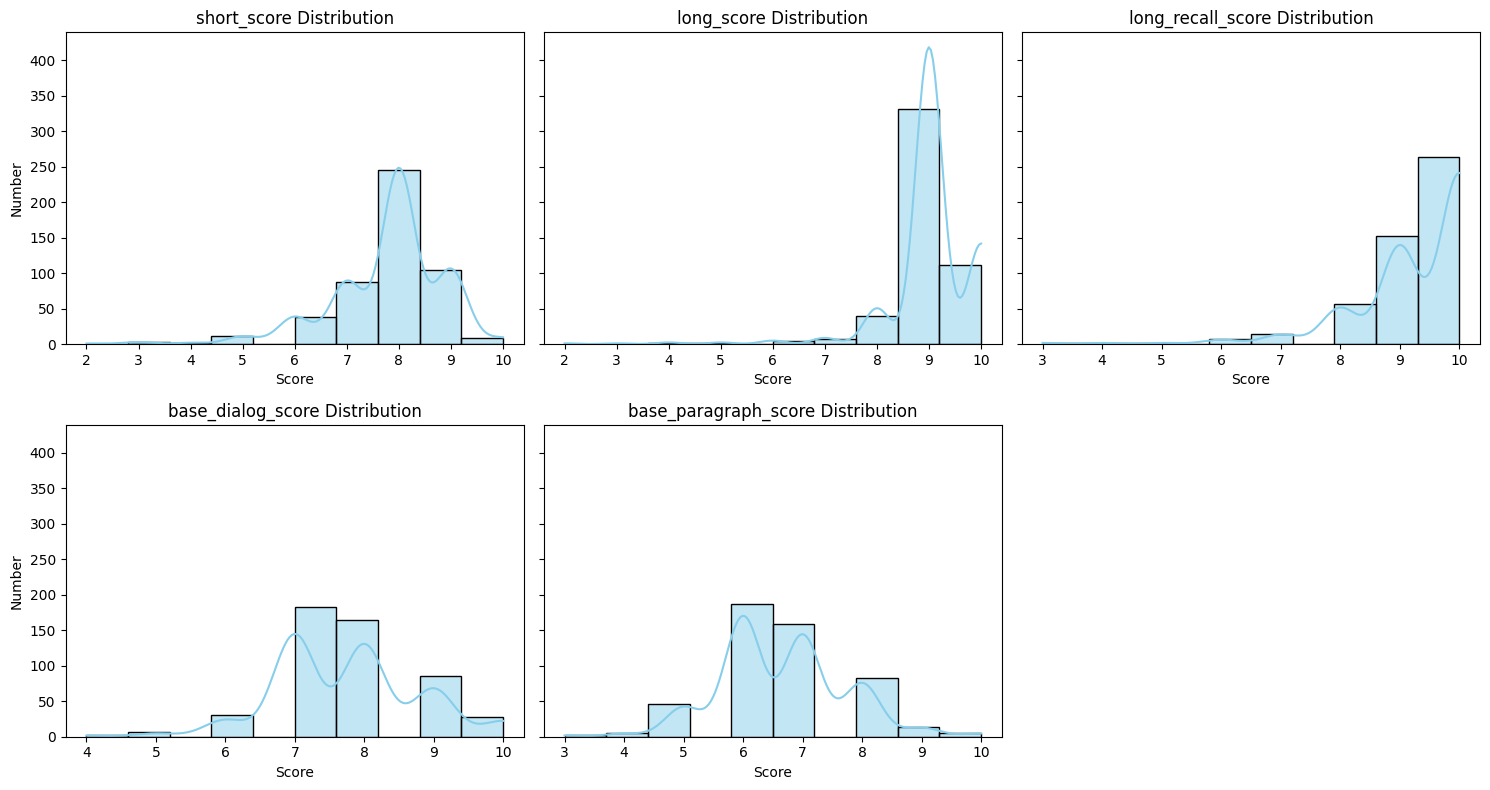

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, column in enumerate(columns):
    data = question_df[column].astype(int)
    sns.histplot(data, bins=10, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel("Score")
    axes[i].set_ylabel("Number")
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()


[0, 1, 3, 2, 11, 38, 87, 245, 104, 9]
[0, 1, 1, 2, 2, 4, 7, 40, 331, 112]
[0, 0, 2, 2, 2, 7, 15, 56, 152, 264]
[0, 0, 0, 2, 6, 30, 183, 165, 86, 28]
[0, 0, 2, 5, 46, 187, 158, 83, 14, 5]


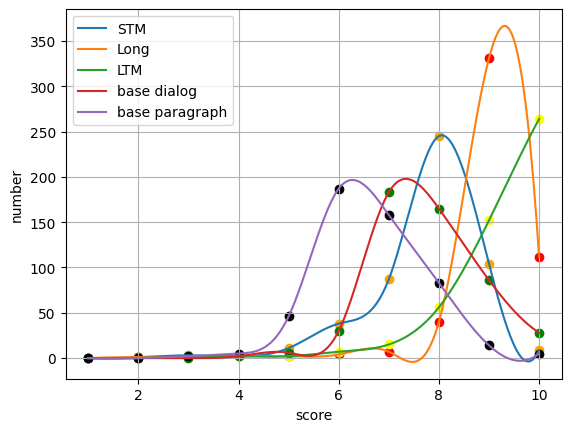

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline

question_df = pd.read_json("eval_result_11_29.json", lines=True)
qwen_df = pd.read_json("eval_result_qwen.json", lines=True)

x = np.array(range(1, 11))
x_smooth = np.linspace(x.min(), x.max(), 300)

y = np.array([question_df['short_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='STM')
plt.scatter(x, y, color='orange') 

y = np.array([question_df['long_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='Long')
plt.scatter(x, y, color='red') 

y = np.array([question_df['long_recall_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='LTM')
plt.scatter(x, y, color='yellow') 

y = np.array([question_df['base_dialog_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='base dialog')
plt.scatter(x, y, color='green') 

y = np.array([question_df['base_paragraph_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='base paragraph')
plt.scatter(x, y, color='black') 

plt.xlabel('score')
plt.ylabel('number')
plt.legend()
plt.grid(True)
plt.show()

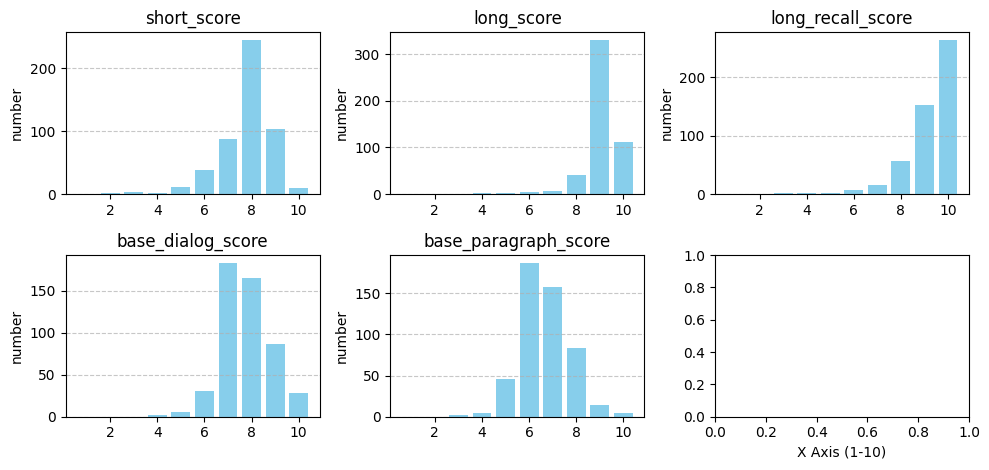

In [30]:
import matplotlib.pyplot as plt
import numpy as np
columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']
# 數據
data = [
    [0, 1, 3, 2, 11, 38, 87, 245, 104, 9],
    [0, 1, 1, 2, 2, 4, 7, 40, 331, 112],
    [0, 0, 2, 2, 2, 7, 15, 56, 152, 264],
    [0, 0, 0, 2, 6, 30, 183, 165, 86, 28],
    [0, 0, 2, 5, 46, 187, 158, 83, 14, 5]
]

x = np.arange(1, 11)  # x 軸是 1~10

# 創建子圖
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# 展平子圖陣列，方便迭代
axes = axes.flatten()

for i, ax in enumerate(axes[:len(data)]):
    ax.bar(x, data[i], color='skyblue')
    ax.set_title(f'{columns[i]}')
    ax.set_ylabel('number')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 設置 x 軸標籤
axes[-1].set_xlabel('X Axis (1-10)')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 調整布局以防止標題重疊
plt.show()


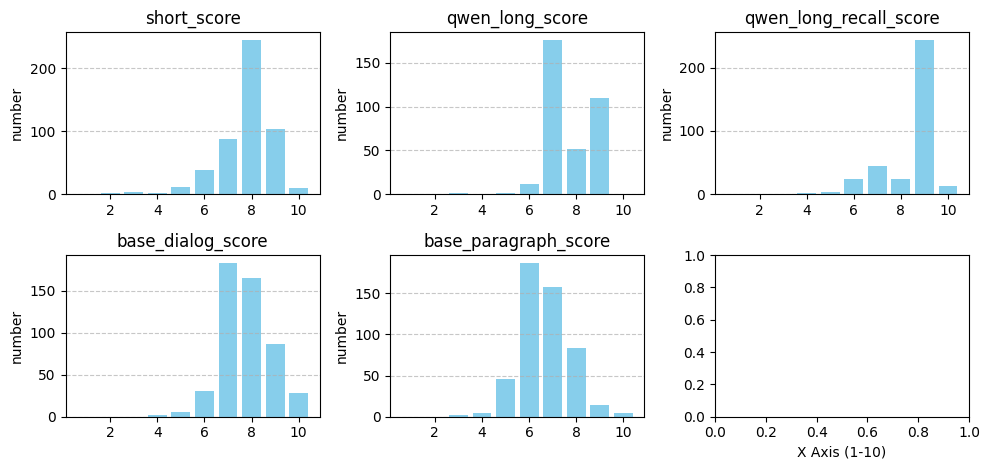

In [4]:
import matplotlib.pyplot as plt
import numpy as np
columns = ['short_score', 'qwen_long_score', 'qwen_long_recall_score', 'base_dialog_score', 'base_paragraph_score']
# 數據
data = [
    [0, 1, 3, 2, 11, 38, 87, 245, 104, 9],
    [0, 0, 1, 0, 1, 12, 176, 51, 110, 0],
    [0, 0, 0, 2, 3, 23, 44, 23, 244, 12],
    [0, 0, 0, 2, 6, 30, 183, 165, 86, 28],
    [0, 0, 2, 5, 46, 187, 158, 83, 14, 5]
]

x = np.arange(1, 11)  # x 軸是 1~10

# 創建子圖
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# 展平子圖陣列，方便迭代
axes = axes.flatten()

for i, ax in enumerate(axes[:len(data)]):
    ax.bar(x, data[i], color='skyblue')
    ax.set_title(f'{columns[i]}')
    ax.set_ylabel('number')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 設置 x 軸標籤
axes[-1].set_xlabel('X Axis (1-10)')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 調整布局以防止標題重疊
plt.show()


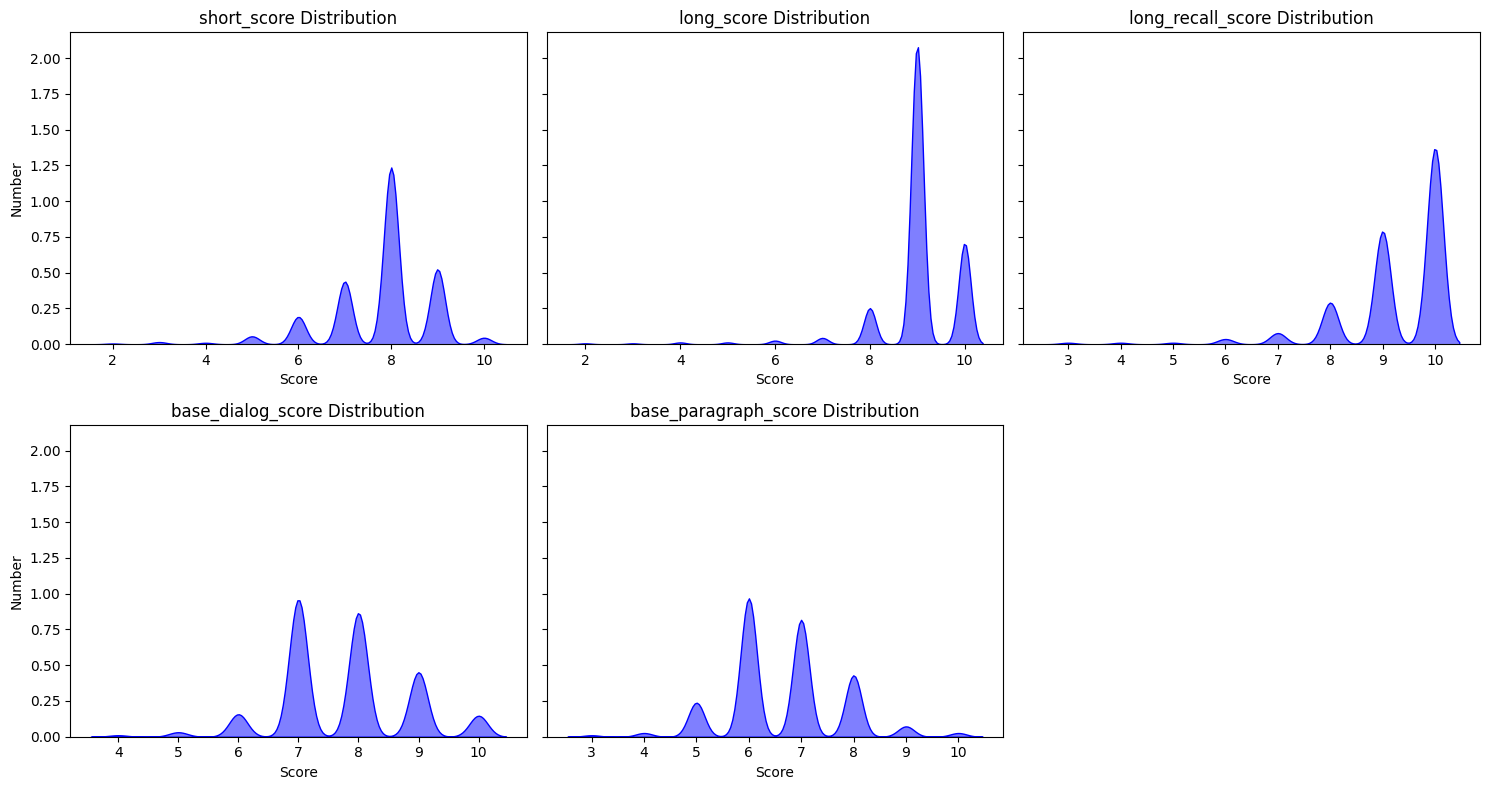

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, column in enumerate(columns):
    data = question_df[column].astype(int)
    sns.kdeplot(data, color='blue', fill=True, alpha=0.5, bw_adjust=0.5, ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel("Score")
    axes[i].set_ylabel("Number")
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()


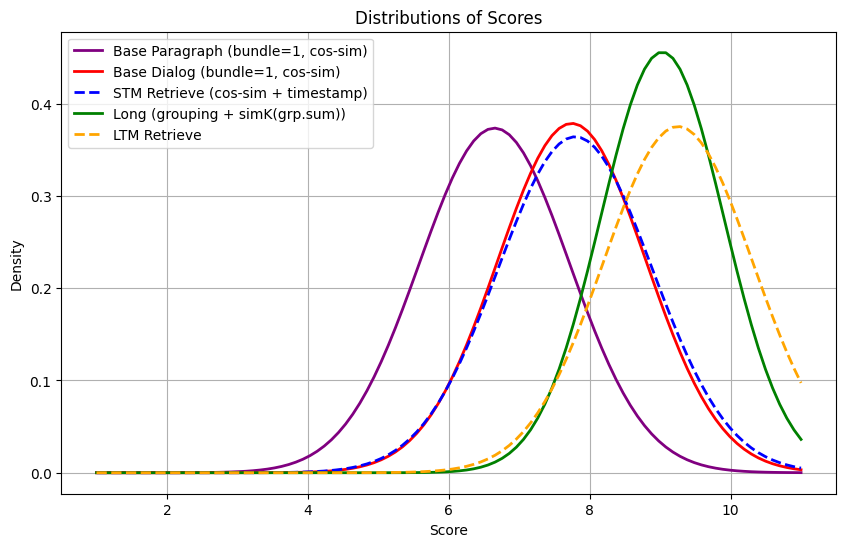

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

plt.figure(figsize=(10, 6))

data5 = question_df['base_paragraph_score'].astype(int)
mu5, std5 = stats.norm.fit(data5)
x5 = np.linspace(1, 11, 100)
p5 = stats.norm.pdf(x5, mu5, std5)
plt.plot(x5, p5, color='purple', linewidth=2, label="Base Paragraph (bundle=1, cos-sim)")

data4 = question_df['base_dialog_score'].astype(int)
mu4, std4 = stats.norm.fit(data4)
x4 = np.linspace(1, 11, 100)
p4 = stats.norm.pdf(x4, mu4, std4)
plt.plot(x4, p4, color='red', linewidth=2, label="Base Dialog (bundle=1, cos-sim)")

data1 = question_df['short_score'].astype(int)
mu1, std1 = stats.norm.fit(data1)
x1 = np.linspace(1, 11, 100)
p1 = stats.norm.pdf(x1, mu1, std1)
plt.plot(x1, p1, color='blue', linewidth=2, linestyle='--', label="STM Retrieve (cos-sim + timestamp)")

data2 = question_df['long_score'].astype(int)
mu2, std2 = stats.norm.fit(data2)
x2 = np.linspace(1, 11, 100)
p2 = stats.norm.pdf(x2, mu2, std2)
plt.plot(x2, p2, color='green', linewidth=2, label="Long (grouping + simK(grp.sum))")

data3 = question_df['long_recall_score'].astype(int)
mu3, std3 = stats.norm.fit(data3)
x3 = np.linspace(1, 11, 100)
p3 = stats.norm.pdf(x3, mu3, std3)
plt.plot(x3, p3, color='orange', linewidth=2, linestyle='--', label="LTM Retrieve")

plt.title("Distributions of Scores")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

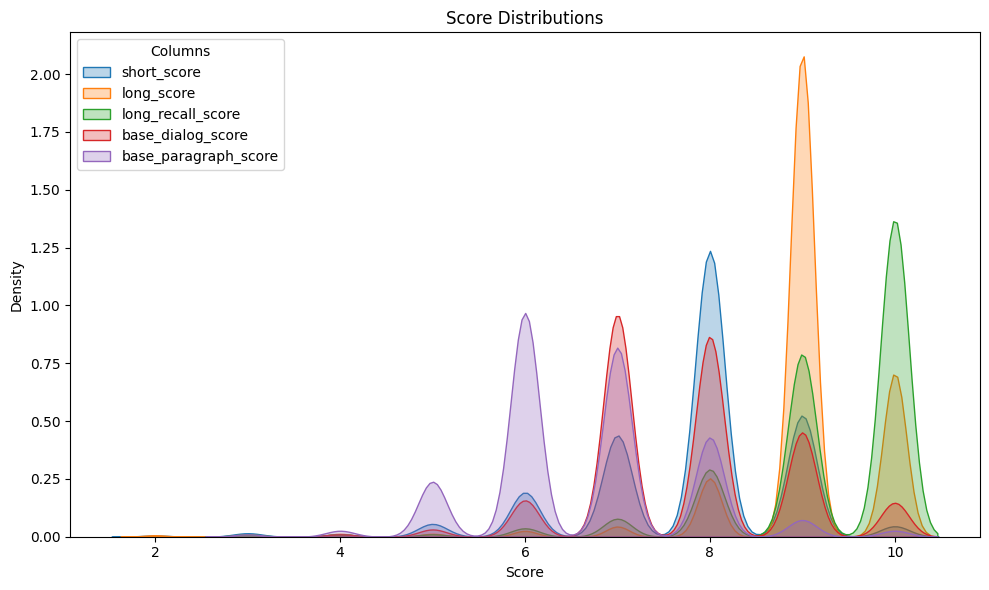

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

plt.figure(figsize=(10, 6))

for column in columns:
    data = question_df[column].astype(int)
    sns.kdeplot(data, label=column, fill=True, alpha=0.3, bw_adjust=0.5)

plt.title("Score Distributions")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Columns")
plt.tight_layout()
plt.show()


Ablation test

In [3]:
import pandas as pd
question_df = pd.read_json("ablation_short.json", lines=True)

In [4]:
observe_df = question_df.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)[:300]
print(observe_df['similarity_score'].astype(int).sum()/300)
print(observe_df['bm25_score'].astype(int).sum()/300)
print(observe_df['keyword_score'].astype(int).sum()/300)
print(observe_df['hyde_score'].astype(int).sum()/300)

8.666666666666666
7.213333333333333
6.78
8.596666666666666


In [5]:
import pandas as pd
question_df = pd.read_json("ablation_long.json", lines=True)

In [6]:
observe_df = question_df.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)[:300]
print(observe_df['similarity_score'].astype(int).sum()/300)
print(observe_df['bm25_score'].astype(int).sum()/300)
print(observe_df['keyword_score'].astype(int).sum()/300)
print(observe_df['hyde_score'].astype(int).sum()/300)

8.9
8.203333333333333
7.136666666666667
8.63


Ablation model grouping task

In [1]:
import pandas as pd
group_df = pd.read_json("group_task_model.json", lines=True)

In [19]:
print(group_df['gpt-40-mini_try'].isna().sum())
print(group_df['llama-3_3-70b_try'].isna().sum())
print(group_df['qwen-2.5-32b_try'].isna().sum())
print(group_df['Gemma-2-27b_try'].isna().sum())
print(group_df['llama-3_1-8b_try'].isna().sum())

2
4
2
14
38


In [10]:
print(1-group_df['gpt-40-mini_try'].isna().sum()/len(group_df))
print(1-group_df['llama-3_3-70b_try'].isna().sum()/len(group_df))
print(1-group_df['qwen-2.5-32b_try'].isna().sum()/len(group_df))
print(1-group_df['Gemma-2-27b_try'].isna().sum()/len(group_df))
print(1-group_df['llama-3_1-8b_try'].isna().sum()/len(group_df))

0.9933333333333333
0.9866666666666667
0.9933333333333333
0.9533333333333334
0.8733333333333333


In [7]:
print(group_df['gpt-40-mini_try'].dropna().mean())
print(group_df['llama-3_3-70b_try'].dropna().mean())
print(group_df['qwen-2.5-32b_try'].dropna().mean())
print(group_df['Gemma-2-27b_try'].dropna().mean())
print(group_df['llama-3_1-8b_try'].dropna().mean())

1.0503355704697988
1.054054054054054
1.1476510067114094
1.1538461538461537
1.7938931297709924


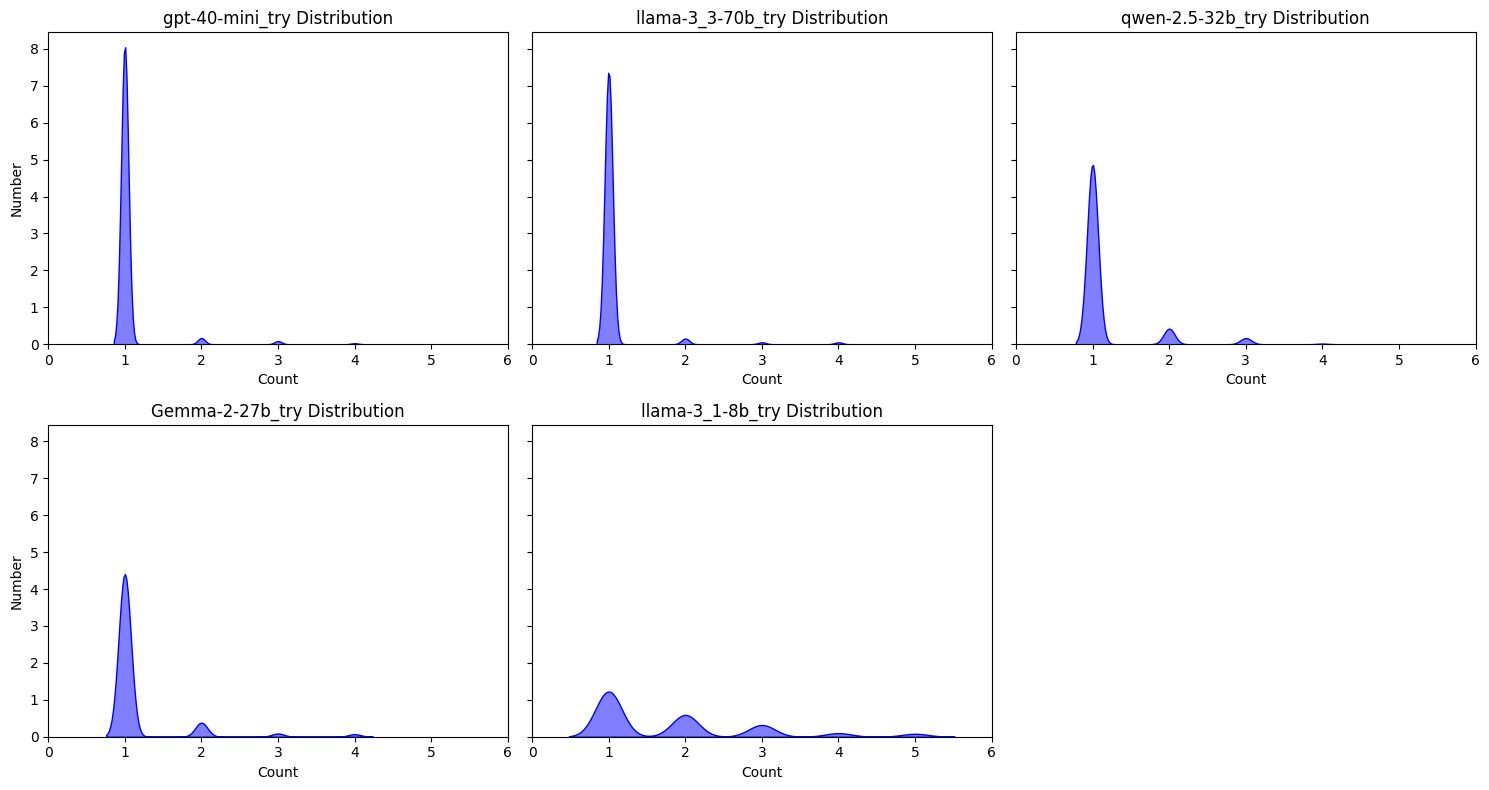

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['gpt-40-mini_try', 'llama-3_3-70b_try', 'qwen-2.5-32b_try', 'Gemma-2-27b_try', 'llama-3_1-8b_try']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, column in enumerate(columns):
    data = group_df[column].dropna().astype(int)
    sns.kdeplot(data, color='blue', fill=True, alpha=0.5, bw_adjust=0.5, ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Number")
    axes[i].set_xlim(0, 6)
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()


In [65]:
index = 6
eval(group_df['gpt-4o-mini'][index])

{'groups': [{'summary': 'User expressed frustration about Karen forgetting to book the conference room for a meeting deadline on 2024-11-20.',
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'User and assistant discussed financial stability strategies, suggesting cooking at home and cancelling unused subscriptions.',
   'chat_logs': [4, 5, 6]},
  {'summary': 'User asked for help with a project on 2022-10-06, struggling to understand the concept.',
   'chat_logs': [7, 8, 9, 10, 11]},
  {'summary': "User reiterated their frustration about Karen's task negligence affecting work meetings on 2022-10-06.",
   'chat_logs': [12, 13, 14]}]}

In [66]:
eval(group_df['llama-3_3-70b'][index])

{'groups': [{'summary': "user's coworker Karen forgot to book conference room",
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'user and assistant discuss financial planning',
   'chat_logs': [4, 5, 6]},
  {'summary': 'assistant helps user with project concept',
   'chat_logs': [7, 8, 9]},
  {'summary': 'user reflects on past experience with Karen and project help',
   'chat_logs': [10, 11]},
  {'summary': 'user vents about Karen forgetting to book conference room again',
   'chat_logs': [12]},
  {'summary': 'user thanks assistant for past help with project',
   'chat_logs': [13, 14]}]}

In [67]:
eval(group_df['qwen-2.5-32b'][index])

{'groups': [{'summary': 'User frustrated with Karen forgetting to book the conference room for a meeting on 2024-11-20. User planned to talk to Karen about it and find solutions.',
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'Discussion on saving money by cooking at home and canceling unused subscriptions on 2024-11-20.',
   'chat_logs': [4, 5, 6]},
  {'summary': 'User sought help with a project concept from assistant on 2022-10-06. User appreciated the support given in past projects.',
   'chat_logs': [7, 8, 9, 10, 11, 12, 13, 14]}]}

In [68]:
eval(group_df['Gemma-2-27b'][index])

{'groups': [{'summary': 'User expresses frustration with coworker Karen forgetting to book a conference room for a team meeting.',
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'User and assistant discuss ways to save money as a team.',
   'chat_logs': [4, 5, 6]},
  {'summary': 'Assistant helps user understand a project concept they are struggling with.',
   'chat_logs': [7, 8, 9, 10, 11]},
  {'summary': 'User vents about Karen forgetting to book a conference room again and thanks the assistant for past help.',
   'chat_logs': [12, 13, 14]}]}

In [69]:
eval(group_df['llama-3_1-8b'][index])

{'groups': [{'summary': "user is frustrated with Karen forgetting to book the conference room for their team's meeting and can't reschedule due to deadline",
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'assistant advises user to talk to Karen about the issue and offers suggestions for improving communication and teamwork',
   'chat_logs': [4, 5, 6]},
  {'summary': 'user asks assistant for help with a project and gets support in understanding the concept',
   'chat_logs': [7, 8, 9, 10]},
  {'summary': "assistant shares an experience about user's past request for help on a project and offers to assist again if needed",
   'chat_logs': [11, 12, 13, 14]}]}

Pretty img

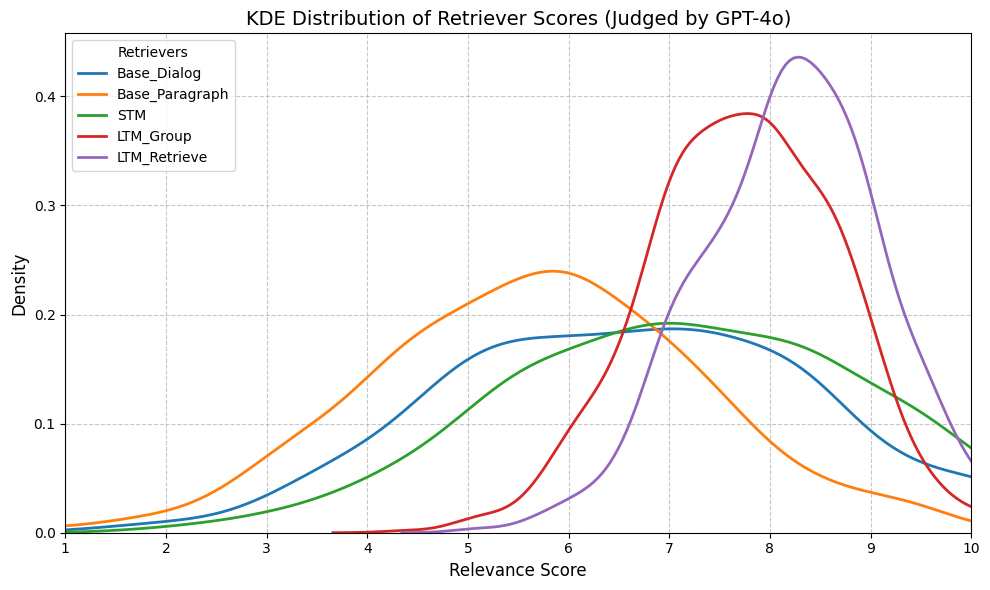

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

retriever_stats = {
    "Base_Dialog": {"mean": 6.72, "std_dev": 1.83},
    "Base_Paragraph": {"mean": 5.72, "std_dev": 1.68},
    "STM": {"mean": 7.39, "std_dev": 1.94},
    "LTM_Group": {"mean": 7.73, "std_dev": 0.96},
    "LTM_Retrieve": {"mean": 8.21, "std_dev": 0.97},
}

np.random.seed()
data = {}
for retriever, stats in retriever_stats.items():
    data[retriever] = np.random.normal(
        loc=stats["mean"], scale=stats["std_dev"], size=1000
    ) 
    
plt.figure(figsize=(10, 6))
for retriever, values in data.items():
    sns.kdeplot(values, label=retriever, linewidth=2)

plt.title("KDE Distribution of Retriever Scores (Judged by GPT-4o)", fontsize=14)
plt.xlabel("Relevance Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xlim(1, 10)
plt.legend(title="Retrievers", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("kde_retriever_scores.png", dpi=300)
plt.show()

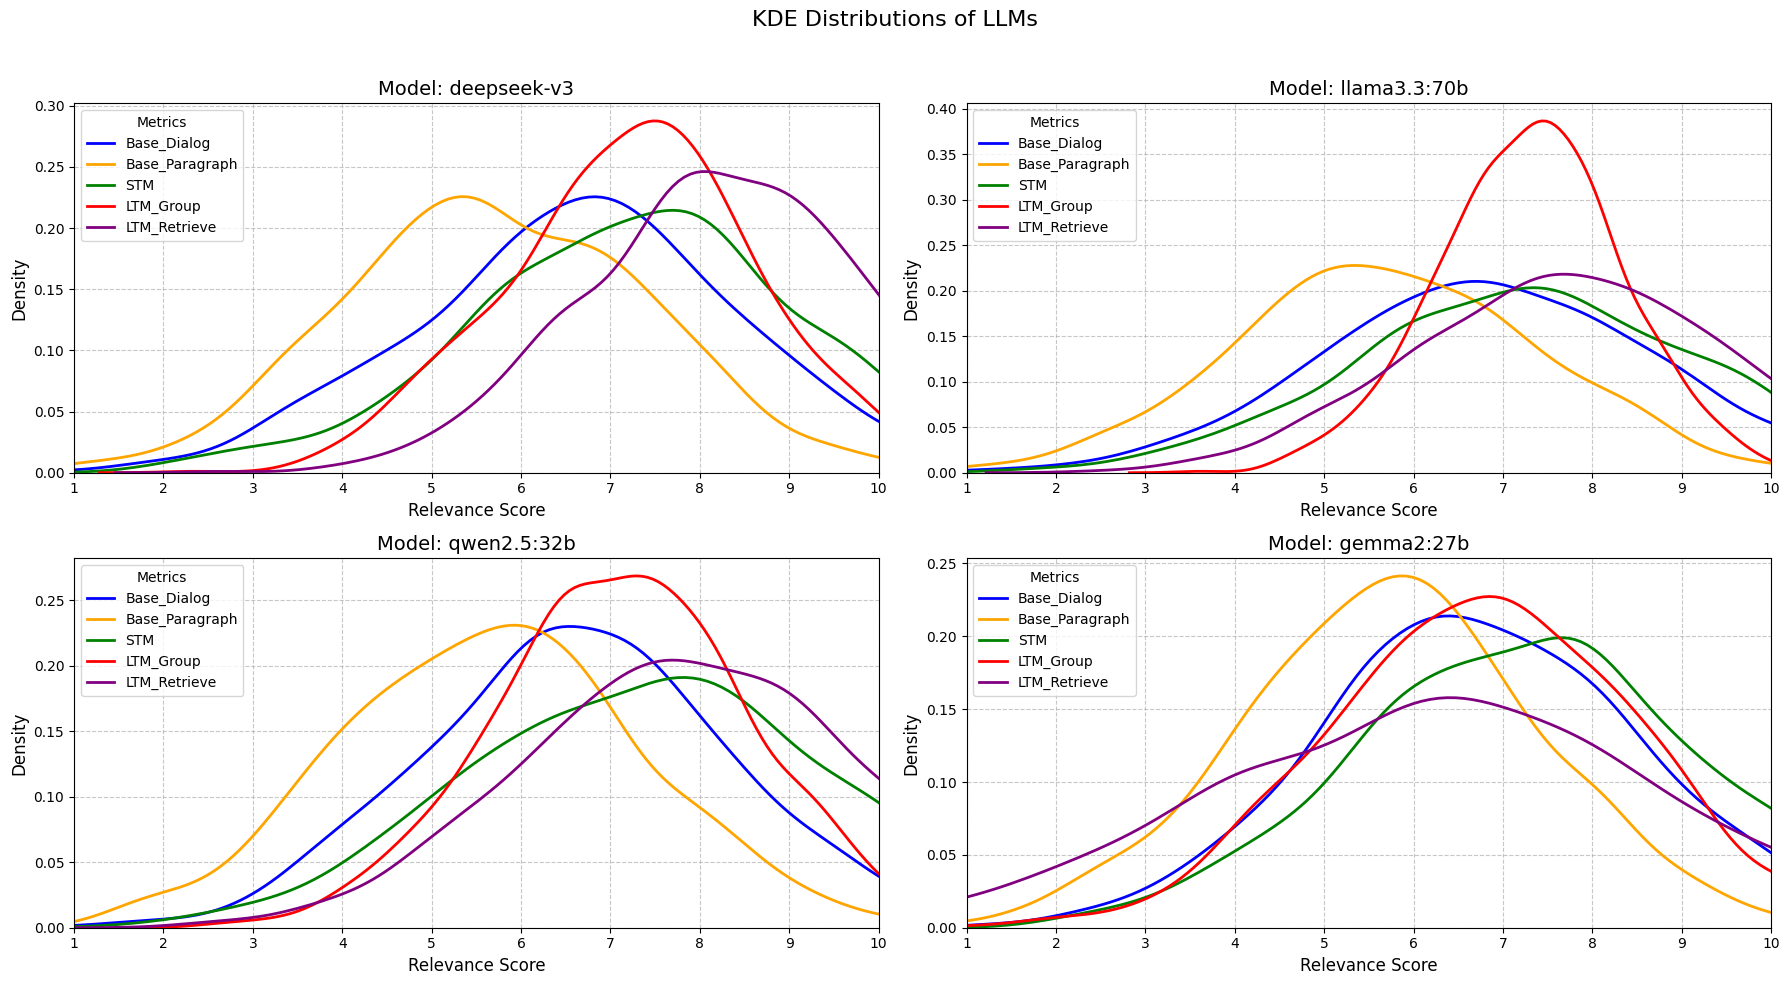

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for KDE
stats = {
    "deepseek-v3": {
        "Base_Dialog": {"mean": 6.72, "std_dev": 1.83},
        "Base_Paragraph": {"mean": 5.72, "std_dev": 1.68},
        "STM": {"mean": 7.39, "std_dev": 1.94},
        "LTM_Group": {"mean": 7.19, "std": 1.38},
        "LTM_Retrieve": {"mean": 8.29, "std": 1.56},
    },
    "llama3.3:70b": {
        "Base_Dialog": {"mean": 6.72, "std_dev": 1.83},
        "Base_Paragraph": {"mean": 5.72, "std_dev": 1.68},
        "STM": {"mean": 7.39, "std_dev": 1.94},
        "LTM_Group": {"mean": 7.31, "std": 1.04},
        "LTM_Retrieve": {"mean": 7.7, "std": 1.80},
    },
    "qwen2.5:32b": {
        "Base_Dialog": {"mean": 6.72, "std_dev": 1.83},
        "Base_Paragraph": {"mean": 5.72, "std_dev": 1.68},
        "STM": {"mean": 7.39, "std_dev": 1.94},
        "LTM_Group": {"mean": 7.14, "std": 1.45},
        "LTM_Retrieve": {"mean": 7.92, "std": 1.89},
    },
    "gemma2:27b": {
        "Base_Dialog": {"mean": 6.72, "std_dev": 1.83},
        "Base_Paragraph": {"mean": 5.72, "std_dev": 1.68},
        "STM": {"mean": 7.39, "std_dev": 1.94},
        "LTM_Group": {"mean": 6.81, "std": 1.73},
        "LTM_Retrieve": {"mean": 6.41, "std": 2.42},
    },
}

# Generate random data for each model
np.random.seed()
data = {}
for model, metrics in stats.items():
    data[model] = {
        "Base_Dialog": np.random.normal(
            loc=metrics["Base_Dialog"]["mean"], scale=metrics["Base_Dialog"]["std_dev"], size=1000
        ),
        "Base_Paragraph": np.random.normal(
            loc=metrics["Base_Paragraph"]["mean"], scale=metrics["Base_Paragraph"]["std_dev"], size=1000
        ),
        "STM": np.random.normal(
            loc=metrics["STM"]["mean"], scale=metrics["STM"]["std_dev"], size=1000
        ),
        "LTM_Group": np.random.normal(
            loc=metrics["LTM_Group"]["mean"], scale=metrics["LTM_Group"]["std"], size=1000
        ),
        "LTM_Retrieve": np.random.normal(
            loc=metrics["LTM_Retrieve"]["mean"], scale=metrics["LTM_Retrieve"]["std"], size=1000
        ),
    }

# Plot all KDEs in a single figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # 2 rows, 3 columns
fig.suptitle("KDE Distributions of LLMs", fontsize=16)

models = list(data.keys())
for i, model in enumerate(models):
    ax = axes[i // 2, i % 2]  # Determine subplot position
    sns.kdeplot(data[model]["Base_Dialog"], label="Base_Dialog", linewidth=2, color="blue", ax=ax)
    sns.kdeplot(data[model]["Base_Paragraph"], label="Base_Paragraph", linewidth=2, color="orange", ax=ax)
    sns.kdeplot(data[model]["STM"], label="STM", linewidth=2, color="green", ax=ax)
    sns.kdeplot(data[model]["LTM_Group"], label="LTM_Group", linewidth=2, color="red", ax=ax)
    sns.kdeplot(data[model]["LTM_Retrieve"], label="LTM_Retrieve", linewidth=2, color="purple", ax=ax)
    
    ax.set_title(f"Model: {model}", fontsize=14)
    ax.set_xlim(1, 10)
    ax.set_xlabel("Relevance Score", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(title="Metrics", fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.7)

# Hide any unused subplots (if applicable)
for j in range(len(models), axes.size):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.savefig("kde_llms_combined.png", dpi=300)
plt.show()